In [26]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
def append_ext(fn):
    return fn+".jpg"
traindf=pd.read_csv('D:\\UNI\\5º Ano - 2º Semestre - 2020-2021 - TESE\\Dataset\\ISIC-2017_Training_Part3_GroundTruth.csv',dtype=str)
testdf=pd.read_csv('D:\\UNI\\5º Ano - 2º Semestre - 2020-2021 - TESE\\Dataset\\ISIC-2017_Test_v2_Part3_GroundTruth.csv',dtype=str)
traindf['image_id']=traindf['image_id'].apply(append_ext)
testdf['image_id']=testdf['image_id'].apply(append_ext)
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [14]:
testdf

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0012086.jpg,0.0,1.0
1,ISIC_0012092.jpg,0.0,0.0
2,ISIC_0012095.jpg,0.0,0.0
3,ISIC_0012134.jpg,0.0,1.0
4,ISIC_0012136.jpg,0.0,1.0
...,...,...,...
595,ISIC_0016068.jpg,0.0,0.0
596,ISIC_0016069.jpg,0.0,0.0
597,ISIC_0016070.jpg,0.0,0.0
598,ISIC_0016071.jpg,0.0,0.0


In [27]:
label=[0]*traindf.shape[0]
for i in range(traindf.shape[0]):
    if traindf['melanoma'][i] == '1.0':
        label[i]='1'
    else:
        label[i]='0'

traindf['label']=label    

In [28]:
train_generator=datagen.flow_from_dataframe(dataframe=traindf,
                                            directory='D:\\UNI\\5º Ano - 2º Semestre - 2020-2021 - TESE\\Dataset\\ISIC-2017_Training_Data\\',
                                            x_col='image_id',
                                            y_col='label',
                                            subset='training',
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(32,32)
                                           )

valid_generator=datagen.flow_from_dataframe(dataframe=traindf,
                                            directory='D:\\UNI\\5º Ano - 2º Semestre - 2020-2021 - TESE\\Dataset\\ISIC-2017_Training_Data\\',
                                            x_col='image_id',
                                            y_col='label',
                                            subset='validation',
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(32,32)
                                           )

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=testdf,
                                                directory='D:\\UNI\\5º Ano - 2º Semestre - 2020-2021 - TESE\\Dataset\\ISIC-2017_Test_v2_Data\\',
                                                x_col='image_id',
                                                y_col=None,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32)
                                               )

Found 1500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 600 validated image filenames.


In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #if this was not binary, it would be softmax. The dense layer should also have more than 1 node
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"]) #if this was not binary, it would be categorical_crossentropy

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 64)       

In [41]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=1
         )

Epoch 1/10
47/47 [==============================] - 384s 8s/step - loss: 0.4852 - accuracy: 0.7965 - val_loss: 0.5822 - val_accuracy: 0.7420
Epoch 2/10
47/47 [==============================] - 309s 7s/step - loss: 0.4488 - accuracy: 0.8329 - val_loss: 0.5692 - val_accuracy: 0.7420
Epoch 3/10
47/47 [==============================] - 303s 6s/step - loss: 0.4316 - accuracy: 0.8454 - val_loss: 0.5866 - val_accuracy: 0.7420
Epoch 4/10
47/47 [==============================] - 305s 7s/step - loss: 0.4426 - accuracy: 0.8381 - val_loss: 0.5739 - val_accuracy: 0.7420
Epoch 5/10
47/47 [==============================] - 298s 6s/step - loss: 0.4360 - accuracy: 0.8385 - val_loss: 0.5721 - val_accuracy: 0.7420
Epoch 6/10
47/47 [==============================] - 322s 7s/step - loss: 0.4552 - accuracy: 0.8303 - val_loss: 0.5759 - val_accuracy: 0.7420
Epoch 7/10
47/47 [==============================] - 316s 7s/step - loss: 0.4212 - accuracy: 0.8543 - val_loss: 0.5728 - val_accuracy: 0.7420
Epoch 8/10
47

In [43]:
model.evaluate(valid_generator,
               steps=STEP_SIZE_VALID)

18/18 [==============================] - 19s 1s/step - loss: 0.5759 - accuracy: 0.7420


[0.5758665800094604, 0.7419999837875366]

In [44]:
test_generator.reset()
pred=model.predict(test_generator,
                   steps=STEP_SIZE_TEST,
                   verbose=1)

18/18 [==============================] - 263s 15s/step


In [66]:
labels_pred=np.where(pred > 0.5, 1, 0)

C:\Users\rafag\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


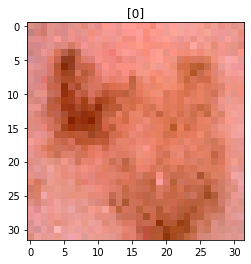

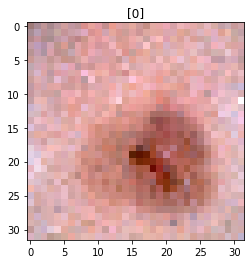

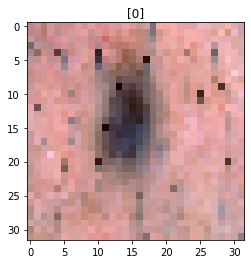

In [67]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
x = test_generator.next() #this unpacks the ImageDataGenerator which is composed by x(image) and y(label). In the case of test, there are labels
for i in range(0,3):
    image = x[i]
    plt.title(labels_pred[i])
    plt.imshow((image*255).astype(np.uint8))
    plt.show()

In [70]:
pred

array([[0.33506602],
       [0.32539606],
       [0.23211399],
       [0.31985468],
       [0.28231895],
       [0.37119272],
       [0.28027564],
       [0.2709357 ],
       [0.2907862 ],
       [0.295164  ],
       [0.3155342 ],
       [0.31099433],
       [0.32242125],
       [0.3376962 ],
       [0.33249676],
       [0.33202553],
       [0.30182767],
       [0.31991124],
       [0.2961595 ],
       [0.31736138],
       [0.34990317],
       [0.3768381 ],
       [0.26656562],
       [0.28447068],
       [0.3389926 ],
       [0.29118466],
       [0.2533957 ],
       [0.29053473],
       [0.326697  ],
       [0.25849438],
       [0.25198996],
       [0.29241073],
       [0.26793432],
       [0.31789607],
       [0.28114924],
       [0.32108474],
       [0.27035162],
       [0.3213511 ],
       [0.2896731 ],
       [0.3112606 ],
       [0.3271054 ],
       [0.27958006],
       [0.3275126 ],
       [0.3236807 ],
       [0.308241  ],
       [0.27219582],
       [0.3238713 ],
       [0.361